### 1. Load the tips dataset from either pydataset or seaborn.

In [68]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pydataset import data
import math
import evaluate

from sklearn.model_selection import train_test_split
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import explained_variance_score


In [2]:
df = data('tips')
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


### 2. Fit a linear regression model (ordinary least squares) and compute yhat, predictions of tip using total_bill.

Here is some sample code to get you started:

- from sklearn.linear_model import LinearRegression

- assuming X and y are already defined

model = LinearRegression().fit(X, y)

predictions = model.predict(X) 

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
#create and fit the model
model = LinearRegression().fit(df[['total_bill']], df.tip)


In [6]:
#use the model
df['yhat'] = model.predict(df[['total_bill']])

In [7]:
#create new colun yhat_baseline
df['yhat_baseline'] = df.tip.mean()

In [8]:
#show new column
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279


<AxesSubplot:xlabel='total_bill', ylabel='tip'>

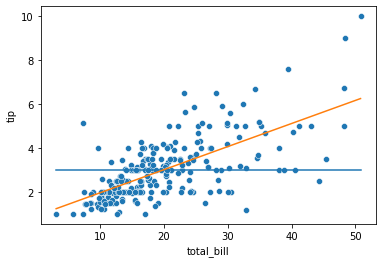

In [9]:
# plot data and prediction line

sns.scatterplot(x = 'total_bill', y = 'tip', data = df)
sns.lineplot(x = 'total_bill', y = 'yhat_baseline', data = df)
sns.lineplot(x = 'total_bill', y = 'yhat', data = df)

## 3. Plot the residuals for the linear regression model that you made.

In [10]:
df['residual'] = df.tip - df.yhat
df['baseline_residual'] = df.tip - df.yhat_baseline

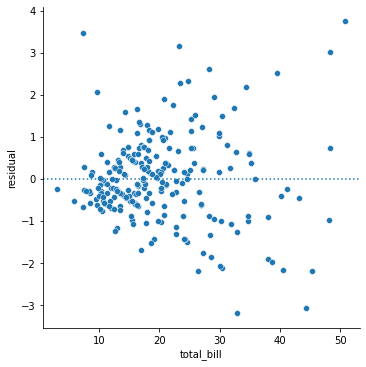

In [11]:
sns.relplot(x = 'total_bill', y = 'residual', data = df)
plt.axhline(0, ls = ':')

### Heteroscedasticity:
- unequal variance of errors
- Heteroscedasticity may also have the effect of giving too much weight to a small subset of the data (namely the subset where the error variance was largest) when estimating coefficients.
- possibily apply some transformations(?)

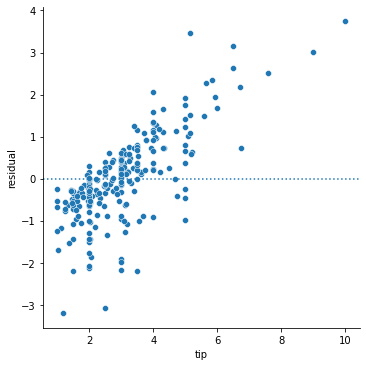

In [12]:
# residual plot (tip vs residuals)

sns.relplot(x = 'tip', y = 'residual', data = df)
plt.axhline(0, ls = ':')

## 4. Calculate the sum of squared errors, explained sum of squares, total sum of squares, mean squared error, and root mean squared error for your model.

In [13]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,yhat,yhat_baseline,residual,baseline_residual
1,16.99,1.01,Female,No,Sun,Dinner,2,2.704636,2.998279,-1.694636,-1.988279
2,10.34,1.66,Male,No,Sun,Dinner,3,2.006223,2.998279,-0.346223,-1.338279
3,21.01,3.50,Male,No,Sun,Dinner,3,3.126835,2.998279,0.373165,0.501721
4,23.68,3.31,Male,No,Sun,Dinner,2,3.407250,2.998279,-0.097250,0.311721
5,24.59,3.61,Female,No,Sun,Dinner,4,3.502822,2.998279,0.107178,0.611721


In [14]:
#calculate sum of squared errors (SSE)
sse = (df.residual**2).sum()
print(f' The SSE of the OLS model is {round(sse,1)}')

 The SSE of the OLS model is 252.8


In [15]:
#calculate explained sum of squares (ESS)
sse_baseline = (df.baseline_residual**2).sum()
print(f' The SSE of the baseline model is {round(sse_baseline,1)}')

 The SSE of the baseline model is 465.2


In [16]:
#Mean squared error OLS:

mse = sse/len(df)
mse

1.036019442011377

In [17]:
#Mean squared error of baseline model:

mse_baseline = sse_baseline/len(df)
mse_baseline

1.906608512496641

In [18]:
# RMSE of OLS model
rmse = mean_squared_error(df.tip, df.yhat, squared = False)
rmse

1.0178504025697377

In [19]:
# RMSE for the baseline model
rmse_baseline = mean_squared_error(df.tip, df.yhat_baseline, squared = False)
rmse_baseline

1.3807999538298954

In [20]:
# ESS = sum(tips.yhat - tips.tip.mean())**2

ess = sum((df.yhat - df.yhat_baseline)**2)
ess

212.42373319840416

In [21]:
#calculate total sum of squares (TSS)
tss = ess + sse
tss

465.21247704918017

## 5. Calculate the sum of squared errors, mean squared error, and root mean squared error for the baseline model (i.e. a model that always predicts the average tip amount).

In [24]:
df_eval = pd.DataFrame(np.array(['sse', 'mse','rms']), columns=['metric'])
df_eval['model_error'] = np.array([sse,  mse, rmse])


df_eval

,metric,model_error
0,sse,252.788744
1,mse,1.036019
2,rms,1.017850


In [26]:
df_eval['baseline_error'] = np.array([sse_baseline,mse_baseline, rmse_baseline])

df_eval

,metric,model_error,baseline_error
0,sse,252.788744,465.212477
1,mse,1.036019,1.906609
2,rms,1.017850,1.380800


In [28]:
df_eval['better_than_baseline'] = df_eval.baseline_error > df_eval.model_error
df_eval

,metric,model_error,baseline_error,better_than_baseline
0,sse,252.788744,465.212477,True
1,mse,1.036019,1.906609,True
2,rms,1.017850,1.380800,True


In [30]:
#baseline score - done with import
r2_score(df.tip, df.yhat_baseline)

1.1102230246251565e-16

## 6. Write python code that compares the sum of squared errors for your model against the sum of squared errors for the baseline model and outputs whether or not your model performs better than the baseline model.

In [29]:
# break it down

#compare SSE model to SSE baseline
#output: if SSE < sse_baseline, sse performs better than baseline
#OR if SSE > sse_baseline, sse performs worse than baseline

if sse < sse_baseline:
    print(f'The model SSE performs BETTER than the sse_baseline')
else:
    print(f'The model SSE performs WORSE thant the sse_baseline')

The model SSE performs BETTER than the sse_baseline


## 7. What is the amount of variance explained in your model?

In [35]:
from sklearn.metrics import r2_score
r2_score(df.tip, df.yhat)

0.45661658635167657

In [32]:
#explained variance score - using import
evs = explained_variance_score(df.tip, df.yhat)
print('Explained Variance = ', round(evs,3))

Explained Variance =  0.457


## 8. Is your model better than the baseline model?

In [36]:
if rmse < rmse_baseline:
    print(f'The model RMSE performs BETTER than the rmse_baseline')
else:
    print(f'The model RMSE performs WORSE than the rmse_baseline')

The model RMSE performs BETTER than the rmse_baseline


## 9. Create a file named evaluate.py that contains the following functions.

- plot_residuals(y, yhat): creates a residual plot
- regression_errors(y, yhat): returns the following values:
 - sum of squared errors (SSE)
 - explained sum of squares (ESS)
 - total sum of squares (TSS)
 - mean squared error (MSE)
 - root mean squared error (RMSE)
- baseline_mean_errors(y): computes the SSE, MSE, and RMSE for the baseline model
- better_than_baseline(y, yhat): returns true if your model performs better than the baseline, otherwise false

In [44]:
def plot_residuals(actual, predicted):
    residuals = actual - predicted
    plt.hlines(0, actual.min(), actual.max(), ls=':')
    plt.scatter(actual, residuals)
    plt.ylabel('residual ($y - \hat{y}$)')
    plt.xlabel('actual value ($y$)')
    plt.title('Actual vs Residual')
    plt.show()

In [46]:
def residuals(actual, predicted):
    return actual - predicted

def sse(actual, predicted):
    return (residuals(actual, predicted) **2).sum()

def mse(actual, predicted):
    n = actual.shape[0]
    return sse(actual, predicted) / n

def rmse(actual, predicted):
    return math.sqrt(mse(actual, predicted))

def ess(actual, predicted):
    return ((predicted - actual.mean()) ** 2).sum()

def tss(actual):
    return ((actual - actual.mean()) ** 2).sum()

def r2_score(actual, predicted):
    return ess(actual, predicted) / tss(actual)

In [72]:
def regression_errors(actual, predicted):
    return pd.Series({
        'sse': sse(actual, predicted),
        'ess': ess(actual, predicted),
        'tss': tss(actual),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    })

def baseline_mean_errors(actual):
    predicted = actual.mean()
    return {
        'sse': sse(actual, predicted),
        'mse': mse(actual, predicted),
        'rmse': rmse(actual, predicted),
    }

def better_than_baseline(actual, predicted):
    rmse_baseline = rmse(actual, actual.mean())
    rmse_model = rmse(actual, predicted)
    return rmse_model < rmse_baseline

In [74]:
better_than_baseline(df.tip, df.yhat)

TypeError: 'numpy.float64' object is not callable

## 10. Load the mpg dataset and fit a model that predicts highway mileage based on engine displacement. Take a look at all the regression evaluation metrics, and determine whether this model is better than the baseline model. Use the functions from your evaluate.py to help accomplish this.

In [61]:
mpg = data('mpg')

In [62]:
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


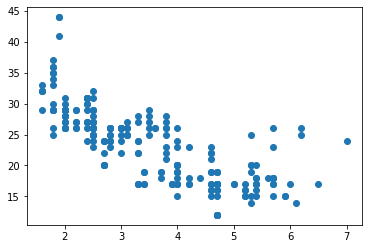

In [63]:
#plot displacement vs highway mpg

plt.scatter(mpg.displ, mpg.hwy)

In [64]:
# create the model object
lm = LinearRegression(normalize=True)

# fit the model to trainig data
lm.fit(mpg[['displ']], mpg.hwy)

# make prediction
predictions = lm.predict(mpg[['displ']])

Text(0, 0.5, 'highway mpg')

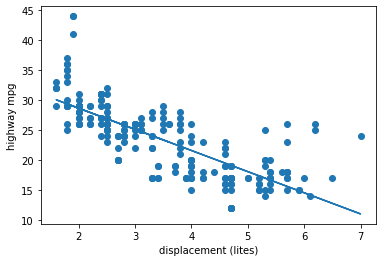

In [65]:
# plot regression line

plt.scatter(mpg.displ, mpg.hwy)
plt.plot(mpg.displ, predictions)
plt.xlabel('displacement (lites)')
plt.ylabel('highway mpg')

Text(0.5, 0, 'displacement (liters)')

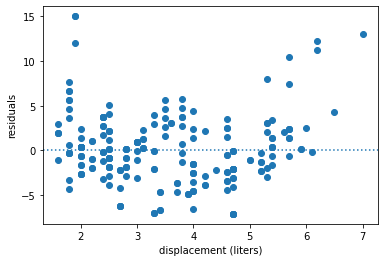

In [66]:
# plot displacement vs residuals

plt.scatter(mpg.displ, (mpg.hwy - predictions))
plt.axhline(0, ls = ':')
plt.ylabel('residuals')
plt.xlabel('displacement (liters)')

In [69]:
# calculate regressions errors
evaluate.regression_errors(mpg.hwy, predictions)

sse     3413.829009
ess     4847.833384
tss     8261.662393
mse       14.589013
rmse       3.819557
dtype: float64

In [70]:
# is our model better than baseline?

evaluate.better_than_baseline(mpg.hwy, predictions)

True

In [71]:
# R2 score

evaluate.r2_score(mpg.hwy, predictions)

0.5867866723989035